# Introduction

This Notebook contains an analysis related to some enviromental problems such as global warming, emissions and energy type, merged with the global mortality rate of the different types of energy.
The analysis will be restricted to the years range 1980-2019 and it will cover the whole world.

# 1) Motivation
> * What is your dataset?

Since this is a really wide topic, for this analysis we will use 6 datesets: 

- Per capita energy use
- Environmental temperature change
- Global mortaly rate by energy source
- Share energy consumption by source 
- Annual CO2 emissions per country
- Population by country

> * Why did you choose these particular datasets?

The goal of this analysis is to deep dive into the environmental problems with a different point of view.
We often hear about reducing emissions, but what about proposing a specific ratio of energy type? 
All these datasets, combined together, allow us to analyze the relationships between global warming, emissions, mortality and energy type, to see the imapact level of the nuclear energy compared to the other energy types and finally to discover if there could be a suitable combination of energy types for each country and to forecast the effect of this specific combination for each country on global warming.

> * What was your goal for the end user's experience?

We would like to communicate the results of this analysis in a clear and easy way for the readers to understand it and consequently think about the environmental problem in a different light, hoping thereby to arouse their interest in this important issue for the world we live in. 

# 2) Basic stats. 
Let's understand the dataset better.

> * Write about your choices in data cleaning and preprocessing

In this section the preprocessing and data cleaning steps will be done for each dataset, by removing columns with null data and columns we don't need for our analysis, by changing some coloumn names and finally by selecting only the range of years 1980-2019. <br>
Therefore, since datasets data1, data4 and data5 contain null values in the "Code" attribute, we will remove it in all of them. 
Secondly, in order to be able to easily merge some datasets together, we will change some columns names such as "Country" and "Year", so that every dataset has these common columns names, as well as changing some attributes name to make them easier to read and use.<br>
In addition, we will also create some datasets that we will need in the analysis phase, by merging and combining different datasets together.



In [1]:
# import libraries
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import matplotlib.pyplot as plt

In [86]:
#loading the data
data1 = pd.read_csv("per-capita-energy-use.csv")
data2 = pd.read_csv("Environment_Temperature_change_E_All_Data_NOFLAG.csv", encoding='windows-1252')
data = [['Coal', 100000], ['Oil', 36000], ['Natural gas', 4000], ['Hydro', 1400], ['Rooftop solar', 440], ['Wind', 150], ['Nuclear', 90]]
data3 = pd.DataFrame(data, columns = ['Energy', 'mortality']) #mortality per thousand terawatt hour
data4 = pd.read_csv("share-energy-consum-by-source.csv")
data5 = pd.read_csv("annual-co2-emissions-per-country.csv")
data6 = pd.read_csv("population_by_country_2020.csv")

---
## Data1: Per capita energy use

This dataset contains three columns: the country, the year and the energy per capita measured in kWh.

In [3]:
#data1.head()
#data1.isnull().sum()
# removing the attribute "Code" which contains null values
data1.pop("Code")
# changing column names
data1.columns=  ['Country', 'Year', 'Energy per capita (kWh)']
data1.head()

,Country,Year,Energy per capita (kWh)
0,Afghanistan,1980,583.294
1,Afghanistan,1981,666.378
2,Afghanistan,1982,725.660
3,Afghanistan,1983,912.140
4,Afghanistan,1984,941.393


---
## Data2: Environmental temperature change

This dataset contains data related to the temperature change and standard deviation in Celsius for every country and every month/year.

In [4]:
#data2.head()
#data2.isnull().sum()

# restriction years range 1980-2019 on the attributes
# Remove columns as index base
# Remove all columns between column index 7 and 26
data2.drop(data2.iloc[: , 7:26], inplace = True, axis = 1)
data2.head()

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1980,Y1981,Y1982,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,-0.393,1.724,0.678,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.222,1.088,-2.101,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,-0.628,1.166,-1.781,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


---
## Data3: Global mortaly rate by energy source

This dataset contains two columns, one for the type of energy and one for the mortality rate associated to each energ type.

In [5]:
data3.head()

,Energy,mortality
0,Coal,100000
1,Oil,36000
2,Natural gas,4000
3,Hydro,1400
4,Rooftop solar,440


---
## Data4: Share energy consumption by source 

This dataset contains the percentages of the different types of energy consumed by every country and by the entire world in the range of years 1980-2019.

In [6]:
#data4.head()
#data4.isnull().sum()
# removing the attribute "Code" which contains null values
data4.pop("Code")

# changing column names
data4.columns=  ['Country', 'Year', 'Oil', 'Coal', 'Solar', 'Nuclear', 'Hydro', 'Wind', 'Gas', 'Others renewables']

# restriction years range 1980-2019
data4= data4[data4.Year >= 1980]
data4= data4[data4.Year < 2020]

data4.head()

,Country,Year,Oil,Coal,Solar,Nuclear,Hydro,Wind,Gas,Others renewables
15,Africa,1980,49.047,32.009,0.0,0.000,7.903,0.0,11.007,0.034
16,Africa,1981,46.881,33.628,0.0,0.000,7.374,0.0,12.085,0.032
17,Africa,1982,46.099,34.736,0.0,0.000,6.909,0.0,12.223,0.032
18,Africa,1983,46.413,34.407,0.0,0.000,6.063,0.0,13.086,0.031
19,Africa,1984,45.905,35.640,0.0,0.509,5.773,0.0,12.142,0.030


Now, we create a new dataset called df_world that contains the percentages of the different types of energy consumed exclusively by the entire world in the range of years 1980-2019.

In [7]:
# df_world
df_world= data4[data4.Country== "World"]
df_world.pop("Country")
df_world.head()

,Year,Oil,Coal,Solar,Nuclear,Hydro,Wind,Gas,Others renewables
4244,1980,45.830,26.869,0.0,2.547,6.196,0.0,18.341,0.177
4245,1981,44.387,27.373,0.0,3.023,6.359,0.0,18.631,0.191
4246,1982,43.230,27.847,0.0,3.300,6.514,0.0,18.841,0.222
4247,1983,42.247,28.249,0.0,3.680,6.684,0.0,18.840,0.242
4248,1984,41.254,28.123,0.0,4.261,6.594,0.0,19.444,0.258


Same only for Sweden.

In [8]:
#df_sweden
df_sweden= data4[data4.Country== "Sweden"]
df_sweden.pop("Country")
df_sweden.head()

,Year,Oil,Coal,Solar,Nuclear,Hydro,Wind,Gas,Others renewables
3534,1980,58.802,3.161,0.0,11.705,26.014,0.000,0.0,0.319
3535,1981,53.386,2.744,0.0,16.807,26.653,0.000,0.0,0.411
3536,1982,52.183,3.210,0.0,18.312,25.826,0.000,0.0,0.470
3537,1983,45.774,4.059,0.0,19.406,30.074,0.001,0.0,0.685
3538,1984,41.358,4.631,0.0,22.791,30.390,0.002,0.0,0.827


Same for India.

In [9]:
#df_india
df_india= data4[data4.Country== "India"]
df_india.pop("Country")
df_india.head()

,Year,Oil,Coal,Solar,Nuclear,Hydro,Wind,Gas,Others renewables
1574,1980,31.180,54.576,0.0,0.563,12.743,0.0,0.938,0.0
1575,1981,30.306,55.444,0.0,0.512,12.261,0.0,1.478,0.0
1576,1982,31.851,55.306,0.0,0.451,10.437,0.0,1.954,0.0
1577,1983,31.825,55.795,0.0,0.612,9.558,0.0,2.210,0.0
1578,1984,31.995,54.881,0.0,0.753,10.001,0.0,2.370,0.0


---
## Data5: Annual CO2 emissions per country

This dataset contains the annual CO2 emissions per each country and for every year in range 1980-2019.

In [10]:
#data5.head()
#data5.isnull().sum()

# removing the attribute "Code" which contains null values
data5.pop("Code")

# common range of years for all datasets
# restriction years range 1980-2019
data5= data5[data5.Year >= 1980]
data5= data5[data5.Year < 2020]

# changing column names
data5.columns=  ['Country', 'Year', 'Annual CO2 emissions']

data5.head()

,Country,Year,Annual CO2 emissions
31,Afghanistan,1980,1756302
32,Afghanistan,1981,1978463
33,Afghanistan,1982,2094581
34,Afghanistan,1983,2519954
35,Afghanistan,1984,2821540


# Data6:  Population by country in 2019

This dataset contains the population by country in 2019 and we will need it to compute the total energy for each country from the Energy per capita (kWh) contained in data1.

In [11]:
#data6

# keeping only the column we need on Population
data6.drop(data6.iloc[: , 2:11], inplace = True, axis = 1)

#changing columns names
data6.columns=['Country', 'Population']
data6.head()

,Country,Population
0,China,1440297825
1,India,1382345085
2,United States,331341050
3,Indonesia,274021604
4,Pakistan,221612785


---
## Merging some datasets together

We will now prepare some datasets that we will need for the exploratory analysis and for the analysis phase.

## data145 

data145 will contain all the types of energy, the energy per capita and the annual CO2 emissions for each county and for each year.

In [12]:
# merging data1, data4 and data5
data14 = pd.merge(data4, data1, on=['Country','Year'])
data145= pd.merge(data14, data5, on=['Country','Year'])
data145.head()

,Country,Year,Oil,Coal,Solar,Nuclear,Hydro,Wind,Gas,Others renewables,Energy per capita (kWh),Annual CO2 emissions
0,Africa,1980,49.047,32.009,0.0,0.000,7.903,0.0,11.007,0.034,3569.616,536509759
1,Africa,1981,46.881,33.628,0.0,0.000,7.374,0.0,12.085,0.032,3861.601,549389371
2,Africa,1982,46.099,34.736,0.0,0.000,6.909,0.0,12.223,0.032,4008.212,572603068
3,Africa,1983,46.413,34.407,0.0,0.000,6.063,0.0,13.086,0.031,4000.224,595441085
4,Africa,1984,45.905,35.640,0.0,0.509,5.773,0.0,12.142,0.030,4017.939,650285298


---
## datanew

datanew will contain data145 filtered by 2019 and all the different percentages of the types of energy will be multiplied for the total energy and divided by 100, in order to obtain the total of consumed energy for each type of energy.

In [13]:
# creating data145 + population in 2019 for the model we will create
datanew= data145[data145.Year == 2019]
datanew= pd.merge(datanew, data6, on=['Country'])
#datanew.head()

In [14]:
# computing the total energy in TeraWh
datanew["Energy total (TeraWh)"] = datanew["Energy per capita (kWh)"]*datanew["Population"]/(1000000000)
data_class = datanew.copy()

In [15]:
#dropping columns
datanew = datanew.drop(["Country","Year"],1)

/var/folders/vt/s658dnz54fbf1fgjx18nklh00000gn/T/ipykernel_39272/1827397456.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  datanew = datanew.drop(["Country","Year"],1)


In [16]:
# computing the total energy for each type of energy 
datanew["Oil"] = datanew["Oil"]*datanew["Energy total (TeraWh)"]/100
datanew["Coal"] = datanew["Coal"]*datanew["Energy total (TeraWh)"]/100
datanew["Solar"] = datanew["Solar"]*datanew["Energy total (TeraWh)"]/100
datanew["Nuclear"] = datanew["Nuclear"]*datanew["Energy total (TeraWh)"]/100
datanew["Hydro"] = datanew["Hydro"]*datanew["Energy total (TeraWh)"]/100
datanew["Wind"] = datanew["Wind"]*datanew["Energy total (TeraWh)"]/100
datanew["Gas"] = datanew["Gas"]*datanew["Energy total (TeraWh)"]/100
datanew["Others renewables"] = datanew["Others renewables"]*datanew["Energy total (TeraWh)"]/100

In [17]:
# dropping some columns 
datanew = datanew.drop(["Energy per capita (kWh)","Population","Energy total (TeraWh)"],1)

/var/folders/vt/s658dnz54fbf1fgjx18nklh00000gn/T/ipykernel_39272/2451298737.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  datanew = datanew.drop(["Energy per capita (kWh)","Population","Energy total (TeraWh)"],1)


In [18]:
datanew.head()

,Oil,Coal,Solar,Nuclear,Hydro,Wind,Gas,Others renewables,Annual CO2 emissions
0,246.710545,5.859011,1.533996,0.000000,0.376397,0.028407,455.674852,0.000000,166641950
1,325.019259,6.265340,1.955546,20.628157,90.581628,12.207920,468.694897,5.857144,167565587
2,553.279009,460.414859,41.326284,0.000000,32.902144,44.934266,499.556494,8.225536,414516833
3,153.032769,35.134220,3.362667,0.000000,101.378347,18.505139,89.460350,11.913809,67962416
4,59.674574,0.014560,0.109201,0.000000,3.871167,0.333062,117.798497,0.200201,38725131


---
> * Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis.

- data2 contains 9656 row and 47 columns and consists of continuous values of temperatures for every year, 4 nominal data columns (Area, Months, Unit and Element) and 3 integer values related to codes. 

- data3 has 7 rows and 2 columns and contains 1 nominal column for the energy type and one integer data column for the mortality.

- data145 contains 3200 rows and 12 columns and has all continues attributes except for Country that is nominal and Year that is interval.

In the next section we will analyze the datasets with some interesting plots.

# 3) Data Analysis

We will proceed by analyzing firstly data2, related to temperature changes from baseline of the pre-industrial times; secondly data3, related to mortality rate for each energy type and, finally, data145, related to CO2 emissions, energy per capita and all the different types of energy.

# Data2

In [19]:
data2.head()

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1980,Y1981,Y1982,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,-0.393,1.724,0.678,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.222,1.088,-2.101,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,-0.628,1.166,-1.781,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


## Plot of the tempearure anomalies from 1980-2019 in the world

In [20]:
# Data 2 and 5: model that determines the relationship between emissions and global warming
data2= data2[data2.Element== "Temperature change"]
data2= data2.drop("Element", 1)

world= data2[data2.Area== "World"]
world= world.drop(["Area Code","Area", "Months Code","Element Code"], 1)
world= world.iloc[:12, :]
world= world.drop(["Months", "Unit"], 1)
#world.head()

/var/folders/vt/s658dnz54fbf1fgjx18nklh00000gn/T/ipykernel_39272/269829081.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data2= data2.drop("Element", 1)
/var/folders/vt/s658dnz54fbf1fgjx18nklh00000gn/T/ipykernel_39272/269829081.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  world= world.drop(["Area Code","Area", "Months Code","Element Code"], 1)
/var/folders/vt/s658dnz54fbf1fgjx18nklh00000gn/T/ipykernel_39272/269829081.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  world= world.drop(["Months", "Unit"], 1)


In [21]:
world= world.melt(id_vars=[], var_name= "Year", value_name= "Temperature Anomalies")
world= world.groupby("Year").mean()
world.head()

,Temperature Anomalies
Year,
Y1980,0.280083
Y1981,0.479500
Y1982,0.041083
Y1983,0.421000
Y1984,0.050333


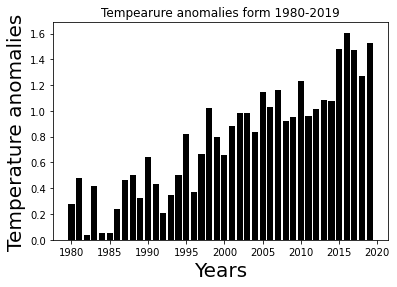

In [22]:
#bar plot with the tempearure anomalies form 1980-2019
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
plt.bar(range(1980, 2020),world["Temperature Anomalies"], color= 'black')
plt.title("Tempearure anomalies form 1980-2019")
plt.rc('axes', titlesize=20)
plt.xlabel("Years", fontsize= 20)
plt.ylabel("Temperature anomalies", fontsize= 20)
plt.show()
#fig.savefig("Tempearure anomalies form 1980-2019.jpg")

## Comment:

From the bar plot above, we can see that the general trend of the temperature anomalies level has been growing a lot in those 40 years with some alternating higher peaks and some valleys. 
Starting from a level of 0,28 in 1980, it reached a peak in 2016 of around 1,61, which is almost 6 times higher.<br>
Global Warming is the long-term heating of Earth’s climate system and it has been observed since the pre-industrial period (between 1850 and 1900). It is due to human activities, primarily fossil fuel burning, which increases heat-trapping greenhouse gas levels in Earth’s atmosphere. [1]<br>
As stated in this Unite Nations' [article](https://www.un.org/en/chronicle/article/health-effects-global-warming-developing-countries-are-most-vulnerable), in the latest 50 years the level of temperatures has increased exponentially and represents a huge warning for the sake of our planet. The World Health Organization (WHO) reports that climate change is responsible for at least 150,000 deaths per year, a number that is expected to double by 2030.
In fact, Global Warming can result in many serious alterations both to the environment and to human health. 
For example it can cause a rise in sea level, leading to the loss of coastal land, a change in precipitation patterns, increased risks of droughts and floods, and threats to biodiversity.
Among the various problems that it can cause to human health we can mention infectious diseases and respiratory diseases such as asthma. <br>
Therefore, we would like to analyze more deeply the average difference of temperature from baseline in some specific areas in the world, the continents.



## Plot the average difference of temperature from baseline by continents from 1980-2019

First of all, we will plot the average difference of temperature from baseline by area from 1980-2019. In particular, we will select some focus areas that represent the continents in the World: Africa, Oceania, Asia, European Union, Northern America and South America.

In [23]:
data2.head()

,Area Code,Area,Months Code,Months,Element Code,Unit,Y1980,Y1981,Y1982,Y1983,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,°C,-0.393,1.724,0.678,0.524,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
2,2,Afghanistan,7002,February,7271,°C,-1.222,1.088,-2.101,0.460,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
4,2,Afghanistan,7003,March,7271,°C,-0.628,1.166,-1.781,-2.406,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234
6,2,Afghanistan,7004,April,7271,°C,2.750,0.990,0.461,-1.410,...,2.591,1.712,1.417,-0.052,0.585,1.589,0.980,1.252,1.442,0.899
8,2,Afghanistan,7005,May,7271,°C,1.842,1.141,0.062,1.078,...,1.419,3.643,0.909,1.201,0.959,1.862,3.246,3.280,0.855,0.647


In [24]:
# plot the average temperature change per year by area
#focus on continents
focus_area= ["Africa", "Oceania", "Asia","European Union", "Northern America", "South America"]
data2_focus= data2[data2.Area.isin(focus_area)]

#keep only temperature change
#data2_focus= data2_focus[data2_focus.Element== "Temperature change"]

data2_focus= data2_focus.drop(["Area Code", "Months Code", "Unit", "Element Code"], 1)

#convert columns of years in rows
data2_focus= data2_focus.melt(id_vars=["Area", "Months"], 
        var_name="Date", 
        value_name="temperature change")
data2_focus.head()

/var/folders/vt/s658dnz54fbf1fgjx18nklh00000gn/T/ipykernel_39272/2082734136.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data2_focus= data2_focus.drop(["Area Code", "Months Code", "Unit", "Element Code"], 1)


,Area,Months,Date,temperature change
0,Africa,January,Y1980,0.559
1,Africa,February,Y1980,0.452
2,Africa,March,Y1980,0.393
3,Africa,April,Y1980,0.665
4,Africa,May,Y1980,0.382


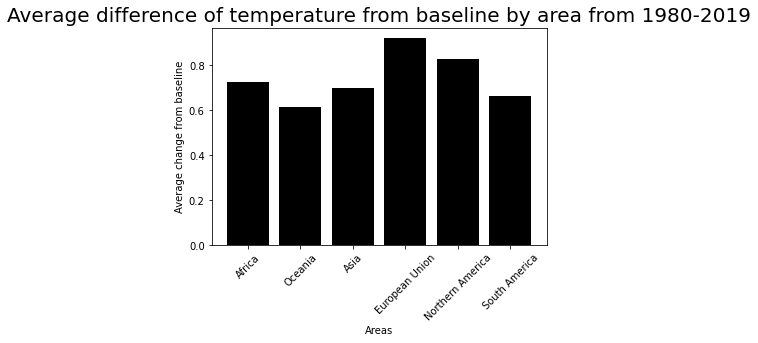

In [25]:
#plot the average difference of temperature from baseline by area from 1980-2019

anniunici= data2_focus.Date.unique()
import numpy as np

average=[]

for continent in focus_area:
    temp1=data2_focus[data2_focus['Area']== continent]
    
    media= temp1["temperature change"].mean() 
    average.append(media)
    
    
fig = plt.figure()
plt.bar(focus_area,average, color= 'black')
plt.title("Average difference of temperature from baseline by area from 1980-2019")
plt.rc('axes', titlesize=20)
plt.xlabel("Areas", fontsize= 10)
plt.ylabel("Average change from baseline", fontsize= 10)#
plt.xticks(rotation=45)
plt.show()
#fig.savefig("Average difference of temperature from baseline by area from 1980-2019.jpg")   
    

## Comment: 

From this bar plot, we can see the average change of temperature from baseline in each of the continents in these 40 years range.
The European Union is the area that records the highest average change of temperature, with a score of almost 1°C,  followed by Northern America (0.8°C). Africa, Asia and South America have an average change score of around 0.7°C. Finally the Oceania is the continent that recorded the least average change of temperature from baseline.


## Plot year-by-year average temperature change from baseline of each of the focus areas across the years 1980-2019

Here we will visualize more deeply the average temperature change from baseline for each of the focus areas every specific year and see if there are some trends. 

In [26]:
# bar-charts displaying the year-by-year average temperature change of each of these focus areas across the years 1980-2019
temperature_per_y= data2_focus.groupby(['Area','Date']).mean().reset_index(drop=False)[['Area', 'Date', 'temperature change']].rename(columns={'temperature change': 'Average temperature change'})           
temperature_per_y.head()

,Area,Date,Average temperature change
0,Africa,Y1980,0.357882
1,Africa,Y1981,0.167824
2,Africa,Y1982,0.156235
3,Africa,Y1983,0.430824
4,Africa,Y1984,0.312647


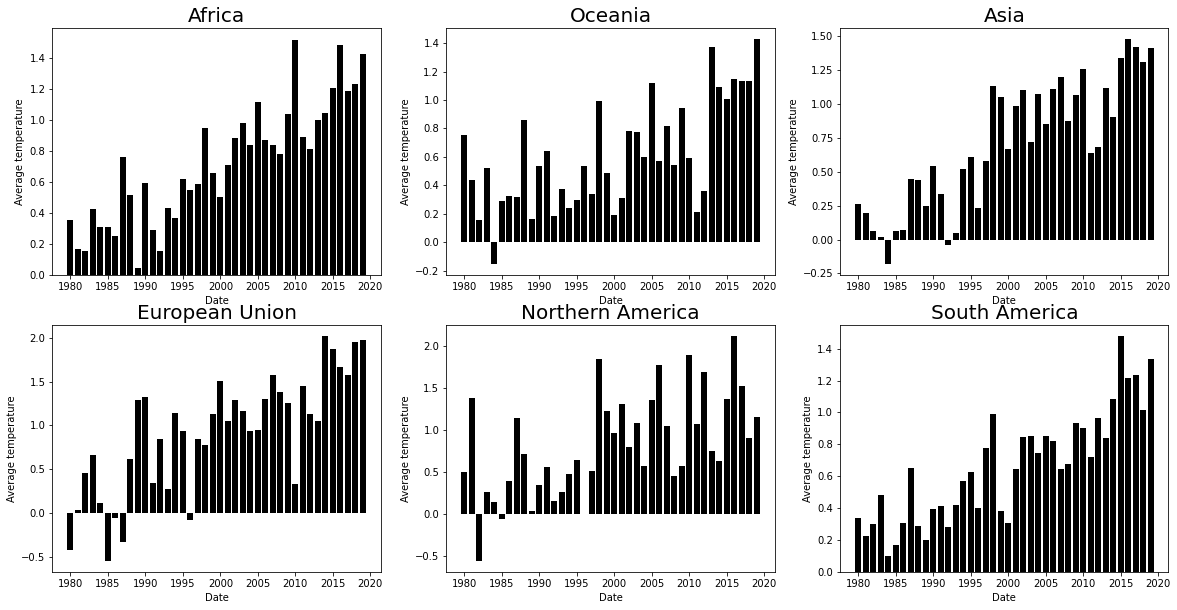

In [27]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax= plt.subplots(2,3,figsize=(20,10))
i=0
axs= ax.ravel()

for continent in focus_area:
    temp1=temperature_per_y[temperature_per_y['Area']== continent]

    axs[i].bar(range(1980, 2020),temp1["Average temperature change"], color= 'black')
    axs[i].title.set_text(continent)
    axs[i].set_xlabel("Date")
    axs[i].set_ylabel("Average temperature")
    i += 1
    #fig.savefig("Average temperature change per year by area from 1980-2019.jpg")  


## Comment:

More deeply, from these subplots, we can notice how European Union and Northern America are the two areas with the highest average temperature change, reaching a peak of 2°C. Their overall trend is increasing and that shows how the global warming is increasing year by year. As we have already seen, the continent that recorded the least average change of temperature from baseline is Oceania and, in fact, from 1980 to 2012 it recorded really low average differences from the baseline. <br>
For what concernes the range years (1980-1990), in almost all areas, except for Africa and South America, there were also recorded negative mean temperature differences, with a negative peak of -0.5°C. 
Unfortunately, in 40 years the global warming problem has become more and more significant and many countries are trying to adopt some strategies to low down the average temperature change of the planet, despite the great consumption and abuse that we make of it day after day by polluting and wasting its resources.<br>
In fact, the latest 5 years (2015-2019), we can notice how Northern America has almost halved its average change of temperature, while the other areas are recording only a slightly lower score.
Probably the global warming will only be reduced in many years, but it is necessary that every citizen of the world has an active role in this change.

# Data3

## Plot of the  mortality rate per each type of energy 

Here we will compare the mortality related to the different types of energy and in particular we want to see the imapact level of the nuclear energy which often generates fear in people.<br>
Is it a well-founded fear? Let's see.

In [28]:
data3

,Energy,mortality
0,Coal,100000
1,Oil,36000
2,Natural gas,4000
3,Hydro,1400
4,Rooftop solar,440
5,Wind,150
6,Nuclear,90


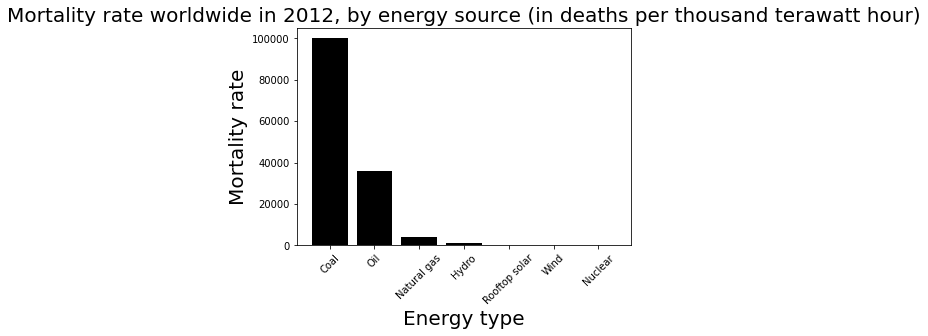

In [29]:
# bar plot of the mortality rate per each type of energy 
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
plt.bar(data3.Energy,data3.mortality, color= 'black')
plt.title("Mortality rate worldwide in 2012, by energy source (in deaths per thousand terawatt hour)")
plt.rc('axes', titlesize=20)
plt.xlabel("Energy type", fontsize= 20)
plt.ylabel("Mortality rate", fontsize= 20)
plt.xticks(rotation=45)
plt.show()
#fig.savefig("mortality rate by energy source.jpg")

### Comment: 

From this bar plot we can see that the mortality rates due to the coal and oil types of energy are the highest, while the nuclear energy has the lowest mortality rate of 90 deaths per thousand terawatt hour.<br>
On contrary, as we know, the nuclear energy is often associated with a feeling of fear among people, but is it a well-founded fear? If it is so safe, why are we afraid of it?<br>
Specialists claim that the nuclear accidents at Three Mile Island, Chernobyl and Fukushima frightened people not because of the number of deaths that was low, but because of how governments responded and managed them, always overreacting. In fact, the panicked and frightened management of governments has always conveyed a very negative message to people about nuclear energy. <br>
As discussed in this [article](https://www.forbes.com/sites/michaelshellenberger/2018/06/11/if-nuclear-power-is-so-safe-why-are-we-so-afraid-of-it/?sh=90774d663859), a first step towards the improvement of this situation could be the change in governments' management of a possible future nuclear accident.<br>
On the other hand, also people can contribute to the improvement of this situation by increasing their awareness of the fact that their fear is irrational, as explained in this [article](https://www.nytimes.com/1983/09/22/opinion/l-the-psychology-of-the-fear-of-nuclear-power-180898.html).<br>
The first principle underlying the irrational fear of nuclear power is the excessive fear of single big risks compared to discounting of risks spread out over time and space and that is why for example people are more scared of plane crashes (which produce few deaths) than car crashes (which produce many deaths).
The second principle is the sense of who controls the risk, since if a person feels he is in control, he will often accept enormous risk. That is why people are more scared of events that they can't control rather than something under their control. 

# Data145


In [30]:
data145.head()

,Country,Year,Oil,Coal,Solar,Nuclear,Hydro,Wind,Gas,Others renewables,Energy per capita (kWh),Annual CO2 emissions
0,Africa,1980,49.047,32.009,0.0,0.000,7.903,0.0,11.007,0.034,3569.616,536509759
1,Africa,1981,46.881,33.628,0.0,0.000,7.374,0.0,12.085,0.032,3861.601,549389371
2,Africa,1982,46.099,34.736,0.0,0.000,6.909,0.0,12.223,0.032,4008.212,572603068
3,Africa,1983,46.413,34.407,0.0,0.000,6.063,0.0,13.086,0.031,4000.224,595441085
4,Africa,1984,45.905,35.640,0.0,0.509,5.773,0.0,12.142,0.030,4017.939,650285298


## plot of the annual CO2 emissions in the world from 1980-2019

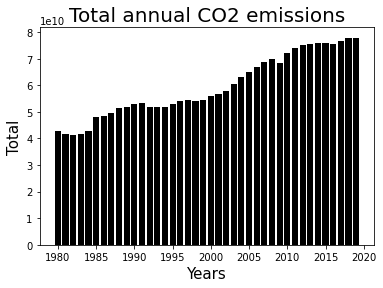

In [31]:
# annual CO2 emissions from 1980-2019

anni_unici= data145.Year.unique()

tot_CO2= np.zeros(len(anni_unici))
i= 0
for anno in anni_unici:
    temp1=data145[data145['Year']== anno]
    tot_CO2[i]= temp1['Annual CO2 emissions'].sum()
    i= i+1

fig = plt.figure()
plt.bar(anni_unici,tot_CO2, color= 'black')
plt.title("Total annual CO2 emissions")
plt.rc('axes', titlesize=20)
plt.xlabel("Years", fontsize= 15)
plt.ylabel("Total", fontsize= 15)
plt.show()
#fig.savefig('Total_annual_CO2_emissions.png')

### Comment: 

In these 40 years, from 1980 to 2019, the total annual CO2 emissions has almost doubled. This reflectes the big changes in the society we are living in. We consume a lot and we have a really big impact on the enviroment. These CO2 levels need to be a huge warning for all of us.<br>
In many coutries, it is common to start taking care of this problem, but unfortunately this is not true in all the world.

## plot of the  annual energy per capita

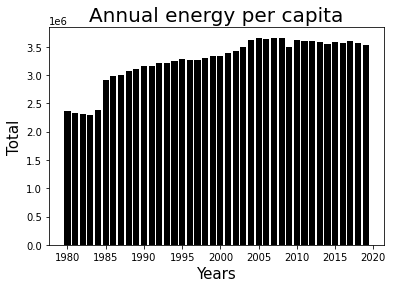

In [32]:
# annual energy per capita 

energy_capita= np.zeros(len(anni_unici))
i= 0
for anno in anni_unici:
    temp1=data145[data145['Year']== anno]
    energy_capita[i]= temp1['Energy per capita (kWh)'].sum()
    i= i+1

fig = plt.figure()
plt.bar(anni_unici,energy_capita, color= 'black')
plt.title("Annual energy per capita")
plt.rc('axes', titlesize=20)
plt.xlabel("Years", fontsize= 15)
plt.ylabel("Total", fontsize= 15)
plt.show()
#fig.savefig('Annual energy per capita.png')

## Comment: 
As can be seen in this bar plot above, the annual energy per capita has increased in the range of years 1980-2005, but it has then slightly decreased or kept on the same level.
This is probably due to the measures that the various countries have decided to adopt to tackle the environmental problem.

## Bar plot with the means of the different types of energy

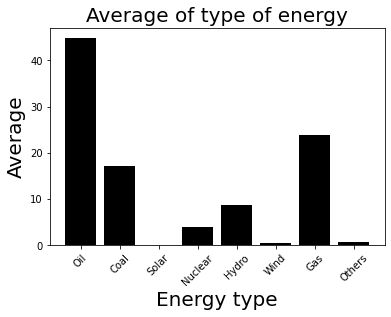

In [33]:
# bar plot with the means of the different types of energy
mean_oil= data145['Oil'].mean()
mean_coal= data145['Coal'].mean()
mean_solar= data145['Solar'].mean()
mean_nuclear= data145['Nuclear'].mean()
mean_hydro= data145['Hydro'].mean()
mean_wind= data145['Wind'].mean()
mean_gas= data145['Gas'].mean()
mean_otherren= data145['Others renewables'].mean()

energy_type= ['Oil', 'Coal', 'Solar', 'Nuclear', 'Hydro', 'Wind', 'Gas', 'Others']
means=[mean_oil, mean_coal, mean_solar, mean_nuclear, mean_hydro, mean_wind, mean_gas, mean_otherren]

fig = plt.figure()
plt.bar(energy_type,means, color= 'black')
plt.title("Average of type of energy")
plt.rc('axes', titlesize=20)
plt.xlabel("Energy type", fontsize= 20)
plt.ylabel("Average", fontsize= 20)
plt.xticks(rotation=45)
plt.show()
#fig.savefig("average_type_of_energy.jpg")

## Comment: 
As can be seen from the bar plot above, on average the most used types of energy are the Oil one, followed by Gas, Coal and then Hydro. On contrary, on average the least used are solar, wind and other types and this can be due to the fact that not all the countries have the proper atmospheric climate to use them in an efficient way.
The nuclear is not so used also due to the fear that it creates in many countries.

## Plot of the annual CO2 emissions from 1980-2019 in some specific countries

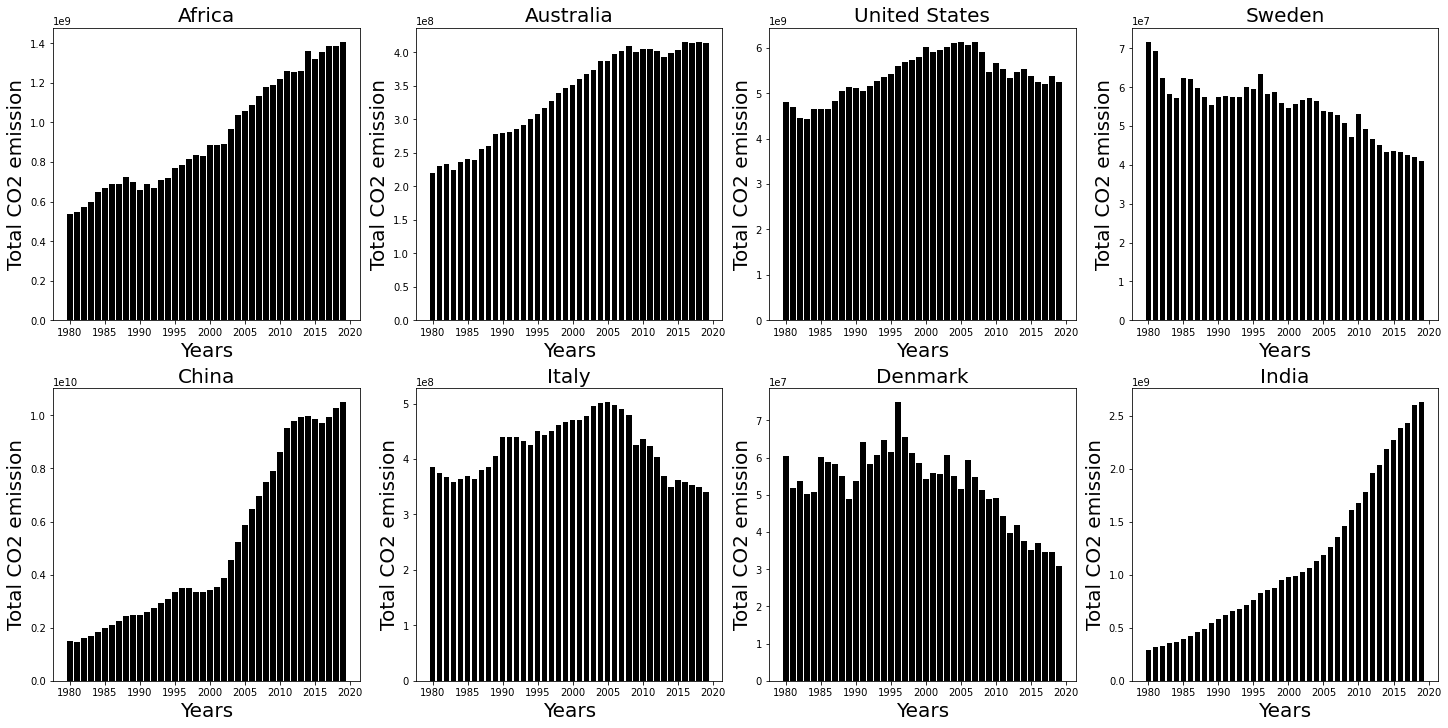

In [34]:
# emissions for each country 
import matplotlib.pyplot as plt
import numpy as np

fig, ax= plt.subplots(2,4, figsize= (20,10), constrained_layout= True)

i=0
axs= ax.ravel()

# selecting 8 countries 
country_names= ["Africa", "Australia", "United States", "Sweden", "China", "Italy", "Denmark", "India"]
years_list= data145.Year.unique()

for country in country_names:
    temp1=data145[data145['Country']== country]
      
    axs[i].bar(temp1.Year, temp1["Annual CO2 emissions"], color= 'black')
    axs[i].title.set_text(country)
    axs[i].set_xlabel("Years", fontsize= 20)
    axs[i].set_ylabel("Total CO2 emission", fontsize= 20)
    
    i+=1


## Comment: 

In this subplot, we can see some common trend and some trend that are completely different from the others.
We can underline 4 kind of trend.
The first one, represented by Africa and Australia, is characterized by an increse in the level of total CO2 emissions over these 40 years; the second one, represented by Italy and United States, is characterized by and increase in the emissions from 1980 to 2006 and by a decrese trend of the emissions from 2006 on; the third one, represented by Sweden and Denmark, is characterized by an overall decresing trend in the emissions level and finally the last one, represented by China and India, characterized by almost an exponential increse in the emissions level.<br>
As we will see better in the analysis step, Sweden is the greenest country in 2019, while countries like China or India, are experiencig the opposite trend, constituting a bad example of action towards the reduction of CO2 emissions.

## Plot map of the CO2 emissions in the world in 2019

After a specific analysis on some countries, we would like to have a look over the whole world, through a world map, colored differently based on a scale of CO2 emissions. 

<AxesSubplot:>

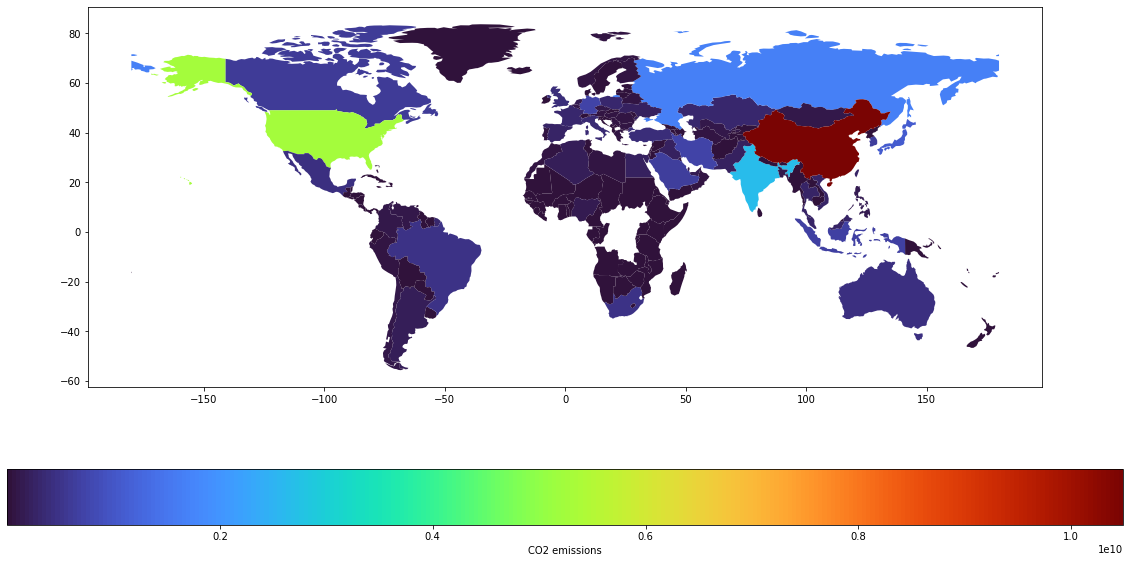

In [35]:
#https://blog.getambee.com/plotting-geographical-data-in-python/ 

# pip install descartes
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import style

#‘naturalearth_lowres’ dataset which contains the shape of all countries in the world
worldmap = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
worldmap["name"].replace({"United States of America": "United States"}, inplace=True)

#We will now merge the data5 filtered for 2019 to the world GeoDataFrame.
data5filtered= data5[data5.Year == 2019]
data5filtered.pop("Year")
data5filtered.columns= ["name", 'CO2 emissions']

#world=world.merge(data5filtered,left_on='name',right_on='name',how='outer')
worldmap=pd.merge(worldmap, data5filtered, on= ["name"])

worldmap.plot(column='CO2 emissions',figsize=(20,10),legend=True, cmap='turbo', legend_kwds={'label': "CO2 emissions",'orientation':"horizontal"},missing_kwds={'color': 'lightgrey'})

## Comment: 

This colored world map gives us at first sight a clear idea of the distribution of the CO2 emissions level over the whole world. The first country that stands out is China with the highest level of emissions, followed by North America, India and Russia. All other nations have high but much lower CO2 levels than these three nations.

## Bokeh plot of the different types of energy

For what concernes the percentages of the different types of energy, we would like to visualize them though Bokeh interactive plots to have a clearer idea of their distribution in the World, in Sweden and in India.

## World

In [36]:
from bokeh.plotting import figure,show, output_file, save
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, CDSView, GroupFilter

#Converting the DataFrame to Bokeh ColumnDataSource
year_energy= ColumnDataSource(data=df_world)
year_energy

ColumnDataSource(id='1002', ...)

In [37]:
# Creating an empty figure
output_notebook()

p = figure(title= "Percentages of the types of energy in the world (1980-2019)", width=950, height=600) 
colors = ["#c9d9d3", "#718dbf", "#e84d60", "#b3de69", "#4de8d5", "#4d60e8", "#e8884d", "green"]

energy_type= ['Oil', 'Coal', 'Solar', 'Nuclear', 'Hydro', 'Wind', 'Gas', 'Others']

# Adding bars
bar ={} # to store vbars 
# here we will do a for loop to create a bar for each race
c=0
for indx,i in enumerate(energy_type):
    bar[i] = p.vbar(x= 'Year',  top=i, source= year_energy, legend_label=i, fill_color= colors[c]) 
    c= c+1
    
# Defining the X-Axis Label
p.xaxis.axis_label = "Year"
 
# defining the Y-Axis Label
p.yaxis.axis_label = "Total"    
    
#Make your legend interactive and display the figure
p.legend.click_policy="mute" #assigns the click policy (you can try to use ''hide') 
p.legend.location = "top_right"
p.legend.orientation= 'horizontal'
show(p)


Loading BokehJS ...

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "top" value "Others" [renderer: GlyphRenderer(id='1165', ...)]


## Comment:

Looking at this interactive Bokeh plot, we can see the amount of each energy type in the world from 1980 to 2019.
In particular we can see that the wind energy is not so common, but it has been used from around 2002 on and has an increasing trend, and similarly also the solar one which has been used since 2012.<br>
The highest one is the Oil energy, whose trend is generally decreasing; followed by the Coal energy, that has an oscillatory trend, with a peak in 2011 and it is currently in the decreasing phase; and followed by the gas energy which has an overall slightly increasing trend over this years period. <br>
The hydro energy has always mantained the same stable level and finally the nuclear energy is the most interesting one since, as we have already seen, it creates fear in people that prefer to avoid its use. In fact, from this plot we can see how its trend has increased in the period 1980-2000, but then, with the beginnning of the new century, it begun to decrease and then stabilized from 2013 on.

## Sweden

In [38]:
#Converting the DataFrame to Bokeh ColumnDataSource
sweden_energy= ColumnDataSource(data=df_sweden)
sweden_energy

ColumnDataSource(id='1238', ...)

In [39]:
# Creating an empty figure
output_notebook()

#output_file("Sweden.html")

p = figure(title= "Percentages of the types of energy in Sweden (1980-2019)", width=950, height=600) 
colors = ["#c9d9d3", "#718dbf", "#e84d60", "#b3de69", "#4de8d5", "#4d60e8", "#e8884d", "green"]

energy_type= ['Oil', 'Coal', 'Solar', 'Nuclear', 'Hydro', 'Wind', 'Gas', 'Others']

# Adding bars
bar ={} # to store vbars 
# here we will do a for loop to create a bar for each race
c=0
for indx,i in enumerate(energy_type):
    bar[i] = p.vbar(x= 'Year',  top=i, source= sweden_energy, legend_label=i, fill_color= colors[c]) 
    c= c+1
    
# Defining the X-Axis Label
p.xaxis.axis_label = "Year"
 
# defining the Y-Axis Label
p.yaxis.axis_label = "Total"    
    
#Make your legend interactive and display the figure
p.legend.click_policy="mute" #assigns the click policy (you can try to use ''hide') 
p.legend.location = "top_right"
p.legend.orientation= 'horizontal'
show(p)

#save(p)

Loading BokehJS ...

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "top" value "Others" [renderer: GlyphRenderer(id='1401', ...)]


## Comment: 

Sweden is a green country and the percentages of distribution of the types of energy is a great example of a country whose level of CO2 emission is decresing over the years.  

## India

In [40]:
#Converting the DataFrame to Bokeh ColumnDataSource
india_energy= ColumnDataSource(data=df_india)

In [41]:
# Creating an empty figure
output_notebook()

#output_file("India.html")

p = figure(title= "Percentages of the types of energy in India (1980-2019)", width=950, height=600) 
colors = ["#c9d9d3", "#718dbf", "#e84d60", "#b3de69", "#4de8d5", "#4d60e8", "#e8884d", "green"]

energy_type= ['Oil', 'Coal', 'Solar', 'Nuclear', 'Hydro', 'Wind', 'Gas', 'Others']

# Adding bars
bar ={} # to store vbars 
# here we will do a for loop to create a bar for each race
c=0
for indx,i in enumerate(energy_type):
    bar[i] = p.vbar(x= 'Year',  top=i, source= india_energy, legend_label=i, fill_color= colors[c]) 
    c= c+1
    
# Defining the X-Axis Label
p.xaxis.axis_label = "Year"
 
# defining the Y-Axis Label
p.yaxis.axis_label = "Total"    
    
#Make your legend interactive and display the figure
p.legend.click_policy="mute" #assigns the click policy (you can try to use ''hide') 
p.legend.location = "top_center"
p.legend.orientation= 'horizontal'
show(p)

#save(p)

Loading BokehJS ...

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "top" value "Others" [renderer: GlyphRenderer(id='1643', ...)]


## Comment: 

Oppositely to Sweden , India uses types of energy that pollute more and that is why their level of emissions are s high and always increasing.

---
# 3) Data Analysis: machine learning part

The goal of this analysis is to deep dive into the environmental problems with a different point of view.
We often hear about reducing emissions, but what about proposing a specific ratio of energy type?
The key point will consist of using the first [greenest country](https://sustainabilitymag.com/top10/top-10-greenest-countries-2)'s energy types proportions. In fact, we will apply Sweden energy types proportions to the whole world and see if the levels of CO2 emissions, temperature anomalies and mortality could improve.<br>
The analysis will be divided in 4 parts:
1) Classification of country as green or not depending on the **CO2 emissions.**

2) Analysis of the current **CO2 emissions** and the hypothetical ones if the Sweden energy types proportions would be used by all the world.

3) Analysis of the current **temperature anomalies** and the hypothetical ones if the Sweden energy types proportions would be used by all the world.

4) Analysis of the current **mortality** and the hypothetical one if the Sweden energy types proportions would be used by all the world.

## 1)  Classification: green or not green

Here, we will make a classification of coutry as green or not green based on the median of the CO2 emissions. If a country's emission level is less than the median of the emissions, it will be considered green, otherwise not green.

We will use the Random Forest Classifier to predict if a country is green or not, firstly using as input the total energy and secondly using the percentages of the types of energy.

In [42]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [43]:
data_temp = datanew.copy()
#data_temp["Country"] = data_class["Country"]

#taking the median of the emissions
median = data_temp["Annual CO2 emissions"].median()

#let's create another column that determines if the country is green or not based on the median of emissions.
data_temp["green"] = (data_temp["Annual CO2 emissions"] <= median).apply(lambda x: int(x))

In [44]:
from sklearn.ensemble import RandomForestClassifier

X = data_temp.drop(["green", "Annual CO2 emissions"], 1)
y = data_temp["green"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train,y_train)

y_hat=rf.predict(X_test)

from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_hat)

/var/folders/vt/s658dnz54fbf1fgjx18nklh00000gn/T/ipykernel_39272/432096056.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data_temp.drop(["green", "Annual CO2 emissions"], 1)


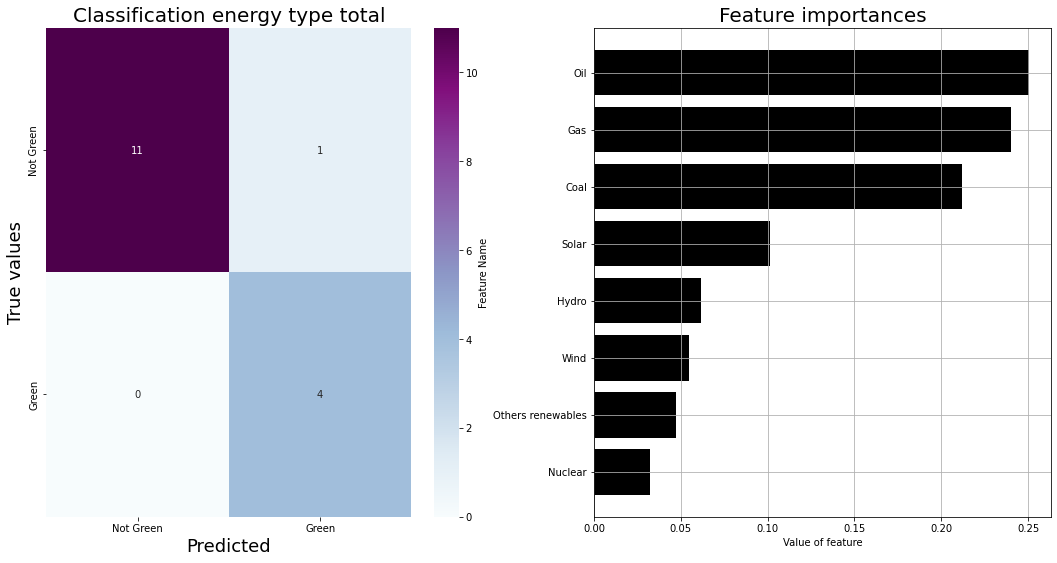

In [45]:
#let's plot theclassification energy type and the feature importances

import matplotlib.pyplot as plt
import seaborn as sns
fig,ax = plt.subplots(1,2, figsize = (18,9))
ax = ax.ravel()

ax[0].set_title('Classification energy type total')
sns.heatmap(cm, annot=True, fmt='g', cmap="BuPu", ax=ax[0],xticklabels=["Not Green", "Green"], yticklabels=["Not Green", "Green"])
ax[0].set_xlabel("Predicted", fontsize=18)
ax[0].set_ylabel("True values", fontsize=18)

#plot the feature importance
importances = rf.feature_importances_
attributeNames = np.asarray(X.columns)
sort = rf.feature_importances_.argsort()
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)[sort]
importances = rf.feature_importances_[sort]

names = attributeNames[sort]


ax[1].barh(names, importances, color="black")
ax[1].set_title("Feature importances")
ax[1].set(xlabel="Value of feature", ylabel="Feature Name")
ax[1].grid()

## Comment: 
As we can see from the cofusion matrix, the model performes very well with almost a 100% accuracy. So, based upon the amount of energy produced by energy type, the model can determine with a high degree of accuracy if the country is green or not. <br>
As we can see, the energy types that produce more emissions are the most influential in the model. This is as expected, as the degree of usage of nuclear energy, that has low emissions, won't influence the amount of emissions.

### What if we used as input the percentage of energy? 
We have seen that the amount of green energy types used isn't influential in the model, but how about the percentage of energy type of total energy used?

In [46]:
data_percentage = data_class.drop(["Country", "Energy per capita (kWh)", "Population","Year"], 1)
X = data_percentage.drop("Annual CO2 emissions",1)
y = data_temp["green"]

/var/folders/vt/s658dnz54fbf1fgjx18nklh00000gn/T/ipykernel_36158/3472401700.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_percentage = data_class.drop(["Country", "Energy per capita (kWh)", "Population","Year"], 1)
/var/folders/vt/s658dnz54fbf1fgjx18nklh00000gn/T/ipykernel_36158/3472401700.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data_percentage.drop("Annual CO2 emissions",1)


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train,y_train)

y_hat=rf.predict(X_test)

from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_hat)

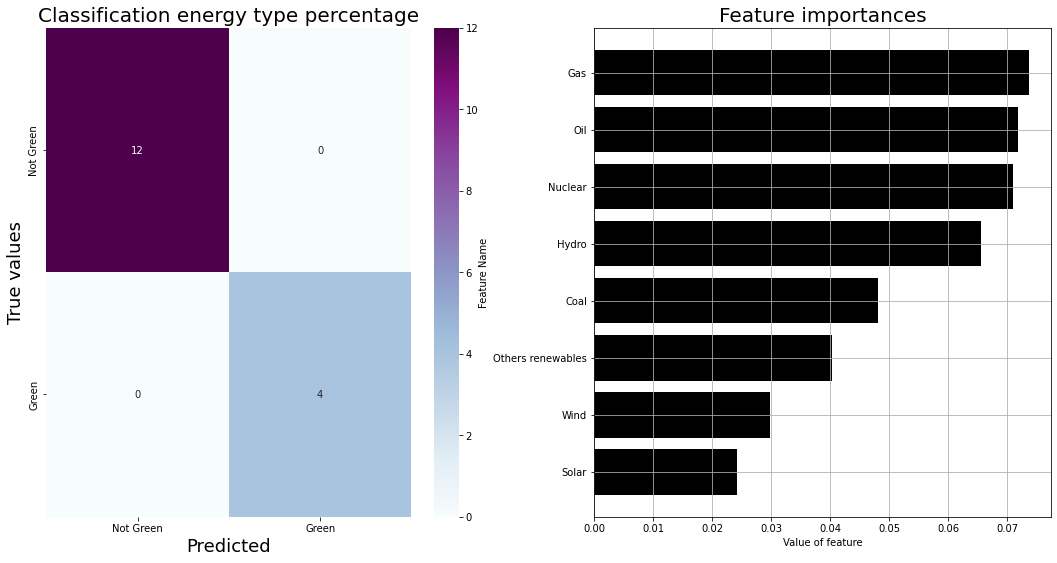

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,2, figsize = (18,9))
ax = ax.ravel()

ax[0].set_title('Classification energy type percentage')
sns.heatmap(cm, annot=True, fmt='g', cmap="BuPu", ax=ax[0],xticklabels=["Not Green", "Green"], yticklabels=["Not Green", "Green"])
ax[0].set_xlabel("Predicted", fontsize=18)
ax[0].set_ylabel("True values", fontsize=18)

#plot the feature importance
importances = rf.feature_importances_
attributeNames = np.asarray(X.columns)
sort = rf.feature_importances_.argsort()
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)[sort]
importances = rf.feature_importances_[sort]
#attributeNames = X_vis3.columns PRIMA DIFFERENZA, ATTENTO
names = attributeNames[sort]


ax[1].barh(names[:-1], importances[:-1], color="black")
ax[1].set_title("Feature importances")
ax[1].set(xlabel="Value of feature", ylabel="Feature Name")
ax[1].grid()

## Comment:
From the confusion matrix above, we can state that this model is even more performative, with a 100% accuracy and, in addition, a total change in feature importance can be noticed.
In fact, nuclear and oil are the most influential. So probably a low usage of oil, and high of nuclear is conducive towards low emissions.

## 2) Current CO2 emissions and Hypothetical ones

In the following code we will develop a model that has an input the energy per type and as output the emissions. We will use the XGBRegressor algorithm. 


In [46]:
data_percentage = data_class.drop(["Country", "Energy per capita (kWh)", "Population","Year"], 1)

/var/folders/vt/s658dnz54fbf1fgjx18nklh00000gn/T/ipykernel_39272/3781231418.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_percentage = data_class.drop(["Country", "Energy per capita (kWh)", "Population","Year"], 1)


In [47]:
X = data_percentage.drop("Annual CO2 emissions",1)
y = data_percentage["Annual CO2 emissions"]

/var/folders/vt/s658dnz54fbf1fgjx18nklh00000gn/T/ipykernel_39272/2078430588.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data_percentage.drop("Annual CO2 emissions",1)


In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
xg_reg = xgb.XGBRegressor()

In [50]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [51]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
norm_rmse = rmse/(max(y)-min(y))
print("Normalized RMSE: %f" % (norm_rmse))

Normalized RMSE: 0.126440


In [52]:
# Assuming the same proportions of Sweden
datanew= data145[data145.Year == 2019]
datanew1= pd.merge(datanew, data6, on=['Country'])

In [53]:
sweden = datanew1[datanew1.Country == "Sweden"]

In [54]:
# applying these proportions to the World 
datanew= data145[data145.Year == 2019]
world2 = datanew[datanew.Country == "World"]#
world2["Population"] = datanew1.Population.sum()#

In [55]:
world2["Tot energy consumption teraWh"] = world2["Population"]*world2["Energy per capita (kWh)"]/1000000000

In [56]:
world_energy = world2.copy()

In [57]:
world2["Oil"] = sweden["Oil"].to_numpy()
world2["Coal"] = sweden["Coal"].to_numpy()
world2["Solar"] = sweden["Solar"].to_numpy()
world2["Nuclear"] = sweden["Nuclear"].to_numpy()
world2["Hydro"] = sweden["Hydro"].to_numpy()
world2["Wind"] = sweden["Wind"].to_numpy()
world2["Gas"] = sweden["Gas"].to_numpy()
world2["Others renewables"] = sweden["Others renewables"].to_numpy()

In [58]:
world2
world_energy_sweden = world2.copy()

Let's predict the emissions of the world based on the model:

In [59]:
X = world2.drop(["Country", "Energy per capita (kWh)","Annual CO2 emissions","Population","Year"], 1)
old_world_emissions = world2["Annual CO2 emissions"]

/var/folders/vt/s658dnz54fbf1fgjx18nklh00000gn/T/ipykernel_39272/2609380845.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = world2.drop(["Country", "Energy per capita (kWh)","Annual CO2 emissions","Population","Year"], 1)


Now we will predict the emissions of the world with the model just created, as if it had the same energy proportions of sweden. 

In [60]:
# hypothetical emissions
new_emissions = xg_reg.predict(X)

In [61]:
xg_reg.get_booster().get_score()

{'Oil': 290.0,
 'Coal': 145.0,
 'Solar': 147.0,
 'Nuclear': 31.0,
 'Hydro': 92.0,
 'Wind': 75.0,
 'Gas': 88.0,
 'Others renewables': 91.0,
 'Energy total (TeraWh)': 356.0}

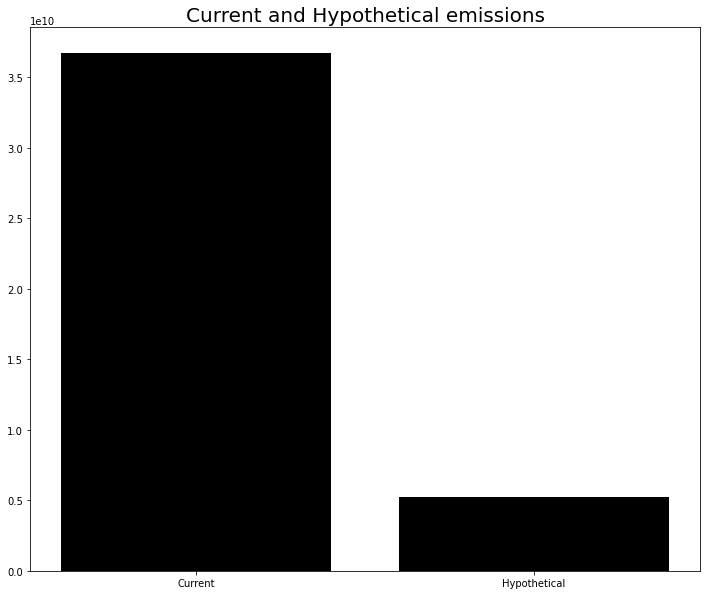

In [62]:
# bar plot of the Current and hypothetical emissions
fig = plt.figure(figsize=(12,10))
plt.bar(["Current", "Hypothetical"],[float(old_world_emissions), float(new_emissions)], color= 'black')
plt.title("Current and Hypothetical emissions")
plt.rc('axes', titlesize=20)
#plt.xlabel("Energy type", fontsize= 20)
#plt.ylabel("Average", fontsize= 20)
plt.show()
#fig.savefig("Current and hypothetical emissions.jpg")

## Comment:
This plot shows the difference in the emissions between the present and if the World would use the Sweden energy types proportions. The result is really impressive and, by this [article](https://earth.stanford.edu/news/roadmap-reducing-greenhouse-gas-emissions-50-percent-2030#gs.z0dz1y), we would almost reach the target we aim reaching in 2050, successfully stopping global warming. 

---
## 3) Current and hypothetical temperature anomalies

In the following code we will build a model that has as input the emissions, and as output the temperature anomalies. <br>
Afterwards, we will use the model to determine the temperature anomalies associated with the hypotetical world emissions determined above. 

In [63]:
world.head()

,Temperature Anomalies
Year,
Y1980,0.280083
Y1981,0.479500
Y1982,0.041083
Y1983,0.421000
Y1984,0.050333


In [64]:
world_emissions = data5[data5.Country == "World"]
world_emissions.head()

,Country,Year,Annual CO2 emissions
23648,World,1980,19492613515
23649,World,1981,19026910179
23650,World,1982,18875760275
23651,World,1983,18998031557
23652,World,1984,19656716874


In [65]:
X = world_emissions["Annual CO2 emissions"].to_numpy().reshape(-1,1)
y = world.to_numpy().reshape(-1,1)

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
xg_reg = xgb.XGBRegressor()

In [68]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [69]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
norm_rmse = rmse/(max(y)-min(y))
print("Normalized RMSE: %f" % (norm_rmse))

Normalized RMSE: 0.211029


In [70]:
# Let's see the level of anomaly with the emissions associated with sweden's proportions
new_anomaly = xg_reg.predict(new_emissions)
old_anomaly = y[-1]

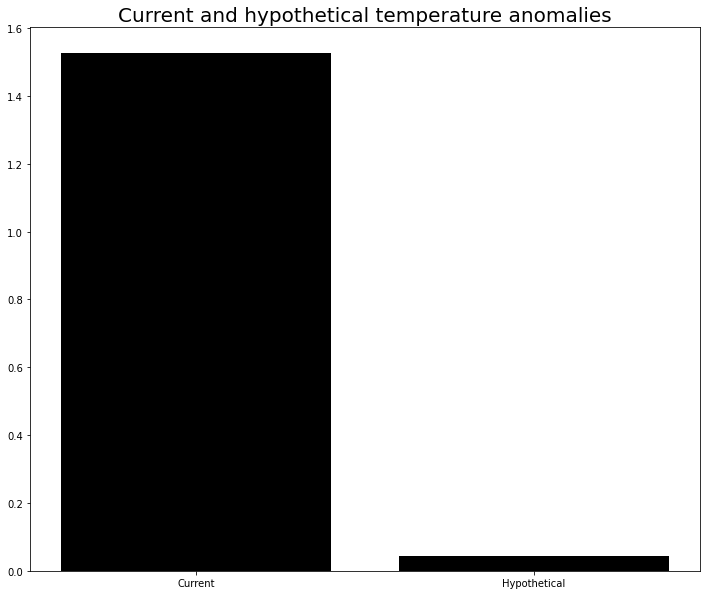

In [71]:
# bar plot of the Current and hypothetical temperature anomalies
fig = plt.figure(figsize=(12,10))
plt.bar(["Current", "Hypothetical"],[float(old_anomaly), float(new_anomaly)], color= 'black')
plt.title("Current and hypothetical temperature anomalies")
plt.rc('axes', titlesize=20)
#plt.xlabel("Energy type", fontsize= 20)
#plt.ylabel("Average", fontsize= 20)
plt.show()
#fig.savefig("Current and hypothetical temperature anomalies.jpg")

## Comment:

Also for what concernes the difference of temperature from the baseline, the distribution of Sweden's energy types would solve the global warming issue by reducing the temperature change from the baseline.
In fact currently its value is around 1.5°C, while the hypothetical one would be almost 0.

---
## 4) Current and hypothetical mortality

Finally here we will confront the current world level of mortality and the hypotetical ones associated with Sweden's energy proportions. <br>
To do so, we will apply the deaths per kWh of the energy types to the current world energy usage and after with the hypotetical one with Sweden proportions.

In [72]:
data3

,Energy,mortality
0,Coal,100000
1,Oil,36000
2,Natural gas,4000
3,Hydro,1400
4,Rooftop solar,440
5,Wind,150
6,Nuclear,90


In [73]:
world_energy

,Country,Year,Oil,Coal,Solar,Nuclear,Hydro,Wind,Gas,Others renewables,Energy per capita (kWh),Annual CO2 emissions,Population,Tot energy consumption teraWh
3199,World,2019,33.059,27.035,1.105,4.269,6.446,2.183,24.226,0.995,20941.391,36702502903,6270759983,131318.436671


In [74]:
world_energy_sweden

,Country,Year,Oil,Coal,Solar,Nuclear,Hydro,Wind,Gas,Others renewables,Energy per capita (kWh),Annual CO2 emissions,Population,Tot energy consumption teraWh
3199,World,2019,25.648,3.779,0.233,26.651,26.135,7.907,1.685,5.218,20941.391,36702502903,6270759983,131318.436671


In [75]:
world_energy["Oil"] = world_energy["Tot energy consumption teraWh"].to_numpy()*world_energy["Oil"].to_numpy()/100
world_energy["Coal"] = world_energy["Tot energy consumption teraWh"].to_numpy()*world_energy["Coal"].to_numpy()/100
world_energy["Solar"] = world_energy["Tot energy consumption teraWh"].to_numpy()*world_energy["Solar"].to_numpy()/100
world_energy["Nuclear"] = world_energy["Tot energy consumption teraWh"].to_numpy()*world_energy["Nuclear"].to_numpy()/100
world_energy["Hydro"] = world_energy["Tot energy consumption teraWh"].to_numpy()*world_energy["Hydro"].to_numpy()/100
world_energy["Wind"] = world_energy["Tot energy consumption teraWh"].to_numpy()*world_energy["Wind"].to_numpy()/100
world_energy["Gas"] = world_energy["Tot energy consumption teraWh"].to_numpy()*world_energy["Gas"].to_numpy()/100
world_energy["Others renewables"] = world_energy["Tot energy consumption teraWh"].to_numpy()*world_energy["Others renewables"].to_numpy()/100

In [76]:
world_energy = world_energy.drop(["Country", "Year", "Energy per capita (kWh)", "Annual CO2 emissions", "Population", "Tot energy consumption teraWh"], 1)
world_energy_sweden = world_energy_sweden.drop(["Country", "Year", "Energy per capita (kWh)", "Annual CO2 emissions", "Population", "Tot energy consumption teraWh"], 1)

/var/folders/vt/s658dnz54fbf1fgjx18nklh00000gn/T/ipykernel_39272/1624011359.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  world_energy = world_energy.drop(["Country", "Year", "Energy per capita (kWh)", "Annual CO2 emissions", "Population", "Tot energy consumption teraWh"], 1)
/var/folders/vt/s658dnz54fbf1fgjx18nklh00000gn/T/ipykernel_39272/1624011359.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  world_energy_sweden = world_energy_sweden.drop(["Country", "Year", "Energy per capita (kWh)", "Annual CO2 emissions", "Population", "Tot energy consumption teraWh"], 1)


In [77]:
world_energy = world_energy / 1000
world_energy_sweden = world_energy_sweden/1000
world_energy_sweden 

,Oil,Coal,Solar,Nuclear,Hydro,Wind,Gas,Others renewables
3199,0.025648,0.003779,0.000233,0.026651,0.026135,0.007907,0.001685,0.005218


In [78]:
mortality_sweden = pd.DataFrame(columns = ["Oil", "Coal", "Gas", "Hydro", "Solar", "Wind", "Nuclear"])

In [79]:
mortality_sweden["Oil"] = world_energy_sweden["Oil"].to_numpy()*data3["mortality"][data3.Energy == "Oil"].to_numpy()
mortality_sweden["Coal"] = world_energy_sweden["Coal"].to_numpy()*data3["mortality"][data3.Energy == "Coal"].to_numpy()
mortality_sweden["Gas"] = world_energy_sweden["Gas"].to_numpy()*data3["mortality"][data3.Energy == "Natural gas"].to_numpy()
mortality_sweden["Hydro"] = world_energy_sweden["Hydro"].to_numpy()*data3["mortality"][data3.Energy == "Hydro"].to_numpy()
mortality_sweden["Solar"] = world_energy_sweden["Solar"].to_numpy()*data3["mortality"][data3.Energy == "Rooftop solar"].to_numpy()
mortality_sweden["Wind"] = world_energy_sweden["Wind"].to_numpy()*data3["mortality"][data3.Energy == "Wind"].to_numpy()
mortality_sweden["Nuclear"] = world_energy_sweden["Nuclear"].to_numpy()*data3["mortality"][data3.Energy == "Nuclear"].to_numpy()

In [80]:
mortality_sweden

,Oil,Coal,Gas,Hydro,Solar,Wind,Nuclear
0,923.328,377.9,6.74,36.589,0.10252,1.18605,2.39859


In [81]:
mortality_world = pd.DataFrame(columns = ["Oil", "Coal", "Gas", "Hydro", "Solar", "Wind", "Nuclear"])

In [82]:
mortality_world["Oil"] = world_energy["Oil"].to_numpy()*data3["mortality"][data3.Energy == "Oil"].to_numpy()
mortality_world["Coal"] = world_energy["Coal"].to_numpy()*data3["mortality"][data3.Energy == "Coal"].to_numpy()
mortality_world["Gas"] = world_energy["Gas"].to_numpy()*data3["mortality"][data3.Energy == "Natural gas"].to_numpy()
mortality_world["Hydro"] = world_energy["Hydro"].to_numpy()*data3["mortality"][data3.Energy == "Hydro"].to_numpy()
mortality_world["Solar"] = world_energy["Solar"].to_numpy()*data3["mortality"][data3.Energy == "Rooftop solar"].to_numpy()
mortality_world["Wind"] = world_energy["Wind"].to_numpy()*data3["mortality"][data3.Energy == "Wind"].to_numpy()
mortality_world["Nuclear"] = world_energy["Nuclear"].to_numpy()*data3["mortality"][data3.Energy == "Nuclear"].to_numpy()

In [83]:
mortality_world

,Oil,Coal,Gas,Hydro,Solar,Wind,Nuclear
0,1.562852e+06,3.550194e+06,127252.817872,11850.700999,638.470239,430.002221,504.538566


In [84]:
mortality_world= mortality_world /1000
mortality_world

,Oil,Coal,Gas,Hydro,Solar,Wind,Nuclear
0,1562.852231,3550.193935,127.252818,11.850701,0.63847,0.430002,0.504539


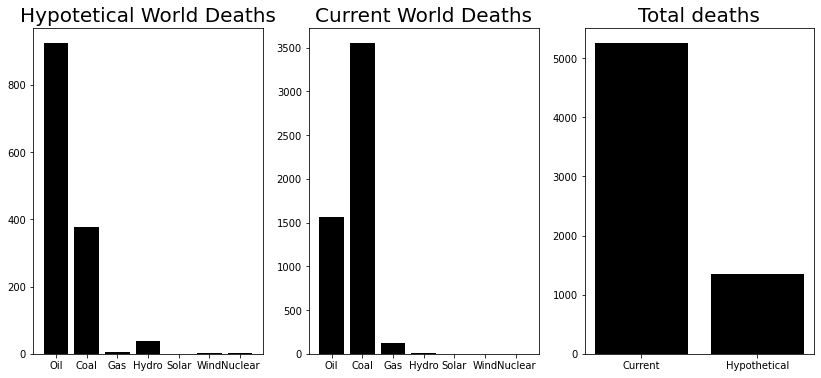

In [85]:
fig, ax = plt.subplots(1,3,figsize=(14,6))
ax = ax.ravel()
ax[0].bar(mortality_sweden.columns.to_numpy(), mortality_sweden.loc[0,:].to_numpy(), color="black")
ax[0].title.set_text("Hypotetical World Deaths")
ax[1].bar(mortality_sweden.columns.to_numpy(), mortality_world.loc[0,:].to_numpy(), color="black")
ax[1].title.set_text("Current World Deaths")
mortality_world_total = mortality_world.sum(axis=1).to_numpy()
mortality_sweden_total = mortality_sweden.sum(axis=1).to_numpy()
# bar plot of the Current and hypothetical mortality rate

ax[2].bar(["Current", "Hypothetical"],[float(mortality_world_total), float(mortality_sweden_total)], color= 'black')
ax[2].title.set_text("Total deaths")

#plt.xlabel("Energy type", fontsize= 20)
#plt.ylabel("Average", fontsize= 20)
plt.show()
#fig.savefig("Current and hypothetical mortality rate.jpg")

## Comment:

From this subplot, we can see on the right the difference in the mortality between the present and the case in which the world is using the distribution of Sweden's type of energy. The mortality would be reduced form over 5000 to 1500.
An in the first 2 plots from the left we can see in particular the mortality related to the type of energy usage. For example, in the present, the majority of the deaths are related to the Coal (3500) and oil (1500) energy; while in the hypothetical case it would be related to oil (reduced to 950) and coal (400) mainly, but on a much lower level.  Also the gas mortality would be reduced, while the only worsening aspect would be linked to the Hydro energy which would register a higher number of deaths and that is probably a direct consequence of the big use of this type of energy that we saw Sweden has (around 30% of the total).

# 4) Genre

> * Which genre of data story did you use?

The genre we chose is the slideshow genre, combined with the magazine one in order to have a nice balance between visualizations and text for explainations. Our aim is to communicate a simple, direct and impactful message so that people can see the optimal results we would have if the whole world used the proportions of different types of energy like Sweden does.

> * Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why?

We decided to chose a **Consistent Visual Platform** for the Visual Strutturing aspect, since it allows us to communicate our story visually in a clear and simple way and that is coherent with the serious topic we analyzed.<br>
Secondly we chose **Feature distinction** for the Highlighting aspect, since it was really useful to communicate visually the differences between the percentages of the different types of energy in the interactive Bokeh plots.


> * Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?

We decided to chose a **Linear** type of Ordering which, similarly to how the Consistent Visual Platform does for the visual part, helps us to communicate the story in a clear and concise way for the narrative part. <br>
Since our priority is the message we want to communicate, we chose an **Explicit Instruction** for the Interactivity aspect. In fact, our goal is to make the website userfriendly and inclusive so that the user experience would be very pleasant and in favor of the important message we convey. Therefore, the Bokeh plots are well guided thorugh their usage and really easy to navigate from the legend, selecting and deselecting the boxes in the legends.<br>
Finally, we chose the **Captions/Headlines** to create a clear and concise structure to the whole website.

# 5) Visualizations

> * Explain the visualizations you've chosen.
> * Why are they right for the story you want to tell?

The visualization we chose are mainly bar plots, confusion matrices for the classfication models, bokeh interactive bar charts to display the different distirbution of energy type and a map of the world to easily display the level of CO2 emission all over the world at first sight.

In particular, bar plots have been really simple and useful to make the reader understand clearly the trend of temperature changes, the CO2 emissions level and the mortality. In fact, the bar plots give instantly the idea of the dimension of things and allow the human eye to see the dimentions and the order among a group of elements.

# 6) Discussion
Think critically about your creation
> * What went well?

We believe we managed to analyze the environmental problems with a different and interesting point of view and that we were also able to convey the results in a simple and clear way on the website, since we believe that not only the analysis is important, but also the communication of the results obtained and discovered to non-scientific readers. 

> * What is still missing? What could be improved? Why?

We could have proceeded to investigate more deeply the reasons why certain countries have higher levels of CO2 emissions and have a distribution of use of energy types that is not optimal, as, for example, in the case of India or China. The lack of this analysis could unjustly lead to ignore the racism linked to environmental problems which is a phenomena spread on an international scale,due to globalization. <br>
For example, as stated in this [article](https://www.weforum.org/agenda/2020/07/what-is-environmental-racism-pollution-covid-systemic/), more than 44 million tonnes of e-waste was generated globally in 2017 and of that, each year around 80% is exported to Asia. Another example is a e-waste hub in China, where heaps of discarded computer parts piled by the river contaminate the water, whose samples showed lead levels 190 times higher than WHO limits.
Even a slight increase in lead levels, meanwhile, can affect IQ and academic performance in children. 
These two examples suggests how pollution data isn't the whole picture, as these countries aren't responsible.<br>
In fact, it often happens that the poorest realities suffer the consequences of environmental disasters due, for example, to the industries managed by the richest realities that cause high level of pollution, in the same way as the coloured and poorer people suffer from the consequences of the white and richer people's actions. [2]


# References 


* [2] https://www.bbc.com/future/article/20220125-why-climate-change-is-inherently-racist

* https://www.un.org/en/chronicle/article/health-effects-global-warming-developing-countries-are-most-vulnerable

* https://www.forbes.com/sites/michaelshellenberger/2018/06/11/if-nuclear-power-is-so-safe-why-are-we-so-afraid-of-it/?sh=90774d663859

* https://www.nytimes.com/1983/09/22/opinion/l-the-psychology-of-the-fear-of-nuclear-power-180898.html

* https://sustainabilitymag.com/top10/top-10-greenest-countries-2

* https://earth.stanford.edu/news/roadmap-reducing-greenhouse-gas-emissions-50-percent-2030#gs.z0dz1y

* https://www.weforum.org/agenda/2020/07/what-is-environmental-racism-pollution-covid-systemic/

* https://climate.nasa.gov/resources/global-warming-vs-climate-change/

# Contributions

Kenneth Paulsen: main responsible for the website and machine learning section of the notebook.

Beatrice Costanza Marrano: main responsible for the notebook except for the machine learning section.